In [83]:
import numpy as np
import pandas as pd
from patsy import dmatrices
import scipy.stats as st

from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [35]:
credit = pd.read_csv('Credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


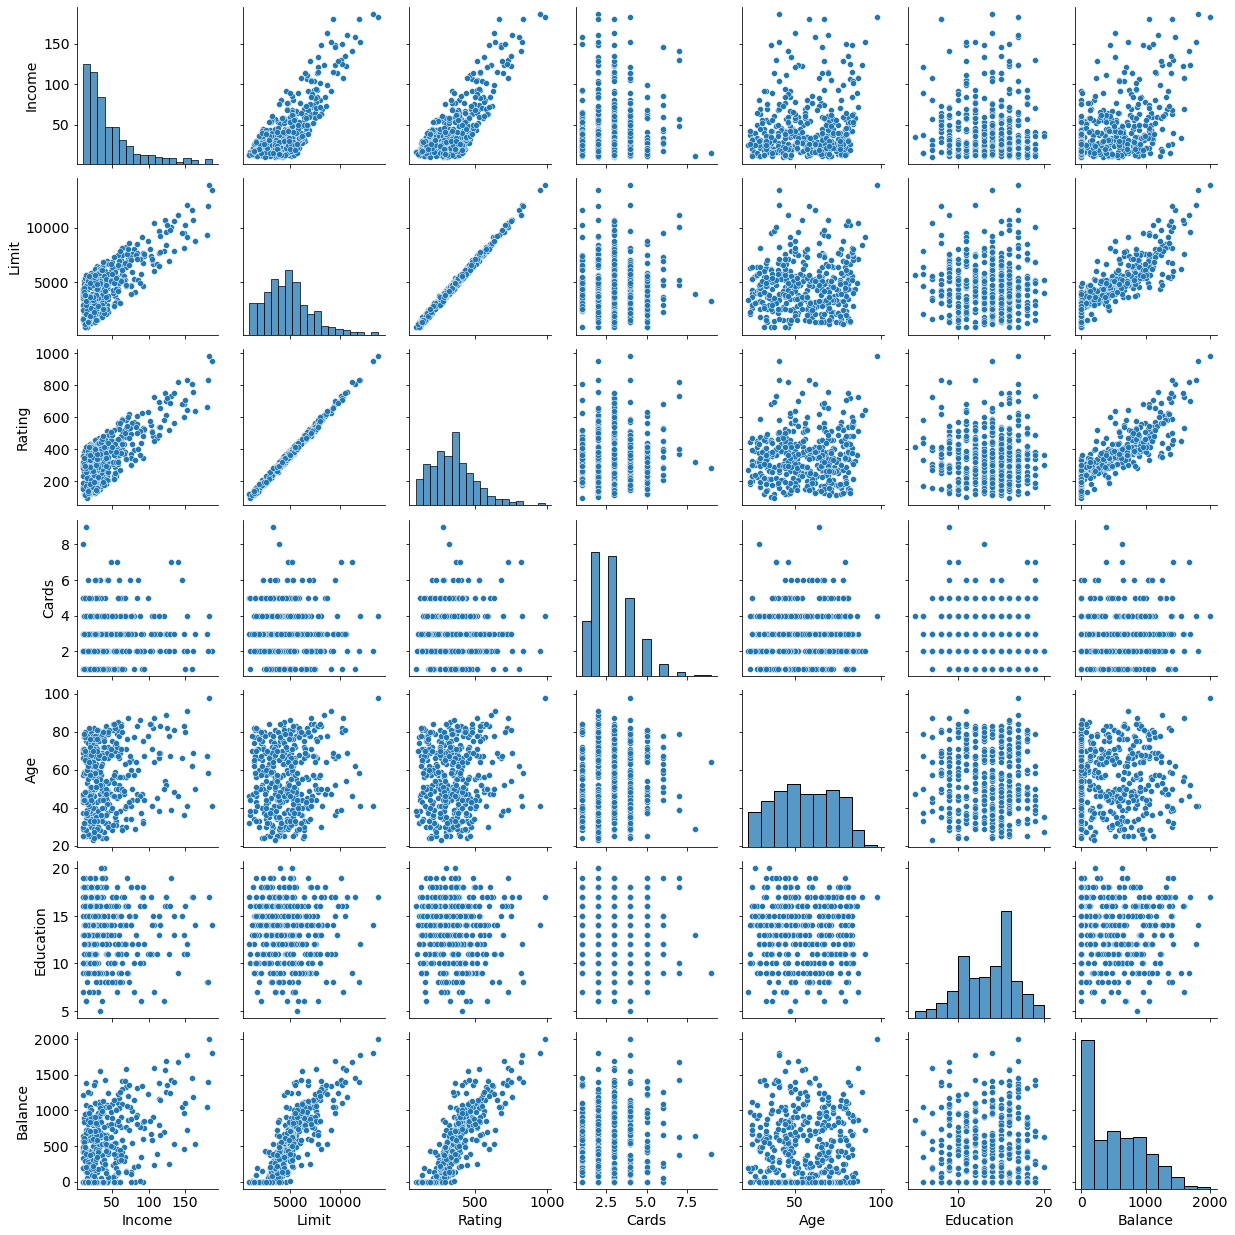

In [36]:
sns.pairplot(credit)

In [76]:
lm = ols("Balance ~ Income+Limit+Rating+Cards+Age+Education", data=credit).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     472.5
Date:                Sun, 29 May 2022   Prob (F-statistic):          3.01e-176
Time:                        01:06:50   Log-Likelihood:                -2598.2
No. Observations:                 400   AIC:                             5210.
Df Residuals:                     393   BIC:                             5238.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -477.9581     55.065     -8.680      0.000    -586.217    -369.699
Income        -7.5580      0.382    -19.766      0.000      -8.310      -6.806
Limit          0.1259      0.053      2.373      0.018       0.022       0.230
Rating         2.0631      0.794      2.598      0.010       0.502       3.625
Cards         11.5916      7.067      1.640      0.102      -2.302      25.485
Age           -0.8924      0.478     -1.867      0.063      -1.832       0.048
Education      1.9983      2.600      0.769      0.443      -3.113       7.110
==============================================================================
Omnibus:                       96.489   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.212
Skew:                           1.397   Prob(JB):                     1.09e-37
Kurtosis:                       4.553   Cond. No.                     3.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
lm = ols("Balance ~ Income+Limit+Rating+Cards+Age+Education+Own+Student+Married+Ethnicity", data=credit).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Sun, 29 May 2022   Prob (F-statistic):          1.11e-253
Time:                        01:09:57   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -489.8611     35.801    -13.683      0.000    -560.250    -419.473
Own[T.Male]               10.6532      9.914      1.075      0.283      -8.839      30.145
Student[T.Yes]           425.7474     16.723     25.459      0.000     392.869     458.626
Married[T.Yes]            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity[T.Asian]        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity[T.Caucasian]    10.1070     12.210      0.828      0.408     -13.899      34.113
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
fit = lm.fittedvalues
residuals = lm.resid
fit

0      418.704625
1      920.700330
2      671.509282
3      972.211448
4      403.044063
          ...    
395    578.853450
396    515.661190
397    255.532178
398    -95.350190
399    948.884844
Length: 400, dtype: float64

In [80]:
residuals

0      -85.704625
1      -17.700330
2      -91.509282
3       -8.211448
4      -72.044063
          ...    
395    -18.853450
396    -35.661190
397   -117.532178
398     95.350190
399     17.115156
Length: 400, dtype: float64

In [82]:
import warnings
warnings.filterwarnings('ignore')
model = ols('Balance ~ Income+Limit+Rating+Cards+Age+Education+Own+Student+Married+Ethnicity', credit).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Own,1.0,3.889191e+04,3.889191e+04,3.984985,4.660593e-02
Student,1.0,5.623889e+06,5.623889e+06,576.240970,1.046263e-78
Married,1.0,1.697586e+04,1.697586e+04,1.739399,1.879928e-01
Ethnicity,2.0,5.803784e+04,2.901892e+04,2.973367,5.229723e-02
Income,1.0,1.770771e+07,1.770771e+07,1814.385899,2.296784e-148
Limit,1.0,5.660799e+07,5.660799e+07,5800.228857,1.953036e-235
Rating,1.0,2.951223e+05,2.951223e+05,30.239132,6.940135e-08
Cards,1.0,1.568351e+05,1.568351e+05,16.069809,7.322135e-05
Age,1.0,4.311422e+04,4.311422e+04,4.417615,3.621389e-02
Education,1.0,4.615158e+03,4.615158e+03,0.472883,4.920746e-01


In [81]:
import warnings
warnings.filterwarnings('ignore')
model = ols('Balance ~ Income+Limit+Rating+Cards+Age+Education', credit).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Income,1.0,1.813117e+07,1.813117e+07,693.904039,7.724275e-89
Limit,1.0,5.533791e+07,5.533791e+07,2117.855960,2.367985e-160
Rating,1.0,4.328357e+05,4.328357e+05,16.565202,5.684281e-05
Cards,1.0,6.355737e+04,6.355737e+04,2.432426,1.196537e-01
Age,1.0,9.022073e+04,9.022073e+04,3.452868,6.388966e-02
Education,1.0,1.543708e+04,1.543708e+04,0.590798,4.425725e-01
Residual,393.0,1.026878e+07,2.612921e+04,NaN,NaN
